# Predictive Modeling

In predictive modeling, the goal is to come up with a machine learning model to predict response variable $Y$ given the independent variable $X$. Here, both $X$ and $Y$ can be multi-dimensional. Mathematically, the independent variable may be related to the response in the form of - 

$$ Y = f(X) + \epsilon $$

We may be interested in predicting $f$ for **Prediction**, **Inference**, or a combination of both. We can denote the estimate of the function $f$ as $\hat{f}$. Therefore, when we make a prediction of the response using the function, our prediction is denoted by - 

$$ \hat{Y} = \hat{f}(X) $$

* **Regression** - Problems where the response variable is quantitative
* **Classification** - Problems where the response variable is qualitative

### Error in the estimate

We can mathematically define and divide the error in the estimate as follows - 

$$ \begin{align*} E[Y-\hat{Y}]^2 &= E[f(X) + \epsilon - \hat{f}(X)]^2 \\  &= [f(X) - \hat{f}(X)]^2 + Var(\epsilon) \end{align*} $$

Here, the first term represents the *reducible* error and the second term represents the *irreducible error*.

### Parametric and Non-Parametric Models

To estimate $f$ we can choose a parametric or non-parametric approach.

1. Parametric Models - In this approach, we make an assumption about the functional form of $f$, therefore reducing the problem of estimating $f$ down to one of estimatic a set of parameters
    * The assumption of the functional form of $f$ introduces 'model bias'.
    * We only have a few parameters to finetune in this approach
2. Non-parametric Models - In this approach, we do not make an explicit assumption about the functional form of $f$. Instead, we try to estimate $f$ that can get as close to the data points as possible
    * Since the problem is not simply estimating a small number of parameters, a very large number of observations are required for an accurate estimation of f
    * We have more flexibility introducing more options for finetuning the model known as hyper-parameters

#### Accuracy vs. Interpretability

As the complexity of the model increases -
* The accuracy of the predictions may increase
* The interpretability of the model may decrease

### Bias Variance Trade-off

* **Variance** refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set.
    * As the complexity of the model increases, the variance of the model increases
    * Error due to model variance can be reduced by considering more observations
* **Bias** refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much
simpler mathematical model.
    * As the complexity of the model increases, the bias of the model decreases
    * Error due to model bias can be reduced by increasing the complexity of the model (Also increases variance)

When measuring the error on the test set, we can write the *expected test MSE* as follows -

$$
E_{\mathit{D}}[\left( y(x|\mathit{D}) - h(x) \right)^2] = [E_{\mathit{D}}[y(x|\mathit{D})] - h(x)]^2 + E_{\mathit{D}}[\left( y(x|\mathit{D}) - E_{\mathit{D}}[y(x|\mathit{D})] \right)^2] + Var(\epsilon)
$$

Here,
* $\mathit{D}$ represents the dataset under consideration
* $y(x|D)$ represents the estimated response of the model given the dataset the model is trained on
* $h(x)$ represents the true function's response (without the irreducible error) for the given x

<br>

* The first term corresponds to $(bias)^2$ when the expectation is evaluated by integrating over the whole dataset $\mathit{D}$. It simply measures how good the average model is.
* The second term corresponds to the model $variance$ when the expectation is evaluated by integrating over the whole dataset $\mathit{D}$. It simply measures how sensitive the model is to variations in the dataset.
* The third term is the irreducible error

### Classification Setting

One of the metrics to evaluate the classification setting is the *error rate*. It is the proportion of mistakes that are made if we apply error rate our estimate $\hat{f}$ to the observations. Mathematically the error rate is defined as -

$$\frac{1}{n} \sum_{i=1}^{n} I(y_i \neq \hat{y}_i ) $$

The **Bayes classifier** assigns each observation to the most likely class, given its predictor values. It uses the conditional distribution of $Y$ given $X$. It basically finds the class label $j$ for which the following quantity is maximum.

$$P(Y=j | X=x_0)$$

The Bayesian decision boundary is the boundary in the $X$ space, where the probabilities of multiple classes (that are the majority on either side of the boundary) are equal. The error rate in Bayes Classifier is given as follows -

$$ 1 - E \left[ max_j P(Y = j|X) \right] $$

This considers the maximum probability (*expected value* over the complete dataset) associated with any class for each prediction, and the error is how much it deviates from 1 (1 representing total confidence in classifying the observation to a particular class). The Bayes error rate exists because of the irreducible error that moves a class away from the ideal boundary and into the opposite class's region?

Bayes classifier is the most ideal classifier as it predicts the most likely class based on the conditional probability distribution. But, in reality, this probability distribution is hard to model and hence Bayes Classifier is not a practical model.

#### Posterior vs Likelihood Estimation

Bayes Theorem is mathematically given by - 

$$ P(Y|X) = \frac{P(Y \cap X)}{P(X)} = \frac{P(X|Y).P(Y)}{P(X)} $$

Here,
* $P(Y|X)$ is known as the *posterior probability*
* $P(X|Y)$ is known as the *likelihood*
* $P(Y)$ is known as the *prior probability*
* $P(X)$ is known as the *marginal probability*. This term does not have an impact on the prediction of $Y$

Some statistical methods model the likelihood whereas some model directly model the posterior probability. When modeling likelihood, we need to be aware of the prior as an imbalanced classifier with a large difference in the prior probability of the classes.

Likelihood based models
* Logistic Regression
* Naive Bayes
* K-Nearest Neighbors
* Decision trees
* Neural Networks - By default, using cross entropy loss in neural network follows Maximum Likelihood Estimation (MLE) and not Maximum A Posteriori (MAP)

Posterior based models
* Random Forest
* Bayesian Neural Networks

> **Doubtful - Need to clarify

### K-Nearest Neighbors

**K-NN Regression**
In the regression setting, given an input $X$, we find the *K* nearest neighbors of the observation and average the response $Y$ for the K training data points. This is a relaxation of the method to estimate the expectation given we have the distribution of the response for the given X. Mathematically -

$$ \hat{f}(x_0) = \frac{1}{K} \sum_{i \in \mathit{N_o}} y_i $$

**K-NN Classification**
In the classification setting, given an input $X$, we find the *K* nearest neighbors ($N_o$) of the observation and provide the probabilities of each class as the fraction of the data points out of the K neighbors that belong to that class. Mathematically -

$$ P(Y=j | X=x_0) = \frac{1}{K} \sum_{i \in \mathit{N_o}} I(y_i = j) $$

**Disadvantages of K-NN**
* K-NN memorizes the whole dataset and hence would require a large memory and at the same time is susceptible to attacks ([Membership Inference Attacks](https://arxiv.org/abs/1610.05820))
* **Curse of Dimensionality** - As the number of dimensions increase, the radius of the hyper-sphere increases (as compared to the bounding hyper-box of the dataset). For 10% neighbors, the radius excedes the boundary of the box as the dimensions increase beyond 5.

![KNN COD](./assets/ISLR/curse-of-dimensionality.png)

#### K-NN Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

Import california housing dataset from sklearn and consider 600 samples

In [2]:
data = fetch_california_housing()

features = data.data
target = data.target

data_array = np.column_stack((features, target))
feature_names = data.feature_names + ['Target']
housing_df = pd.DataFrame(data_array, columns=feature_names).sample(600, random_state=42)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000


Plot the 600 datapoints after log transformation (X=log median income, Y=log median house value)

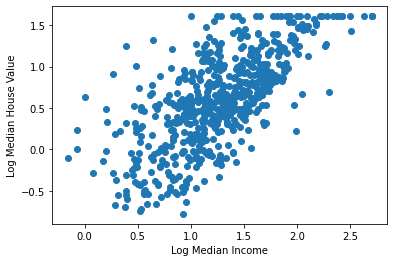

In [3]:
housing_df['log_MedInc'] = housing_df['MedInc'].map(np.log)
housing_df['log_Target'] = housing_df['Target'].map(np.log)

plt.scatter(housing_df['log_MedInc'], housing_df['log_Target'])
plt.xlabel('Log Median Income')
plt.ylabel('Log Median House Value')
plt.show()

Find the best value of K for the K-NN Regressor using a `training_test_split`

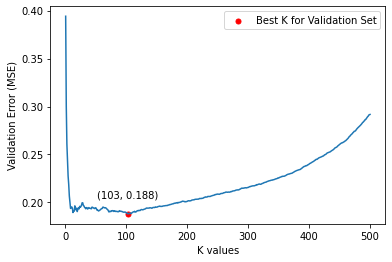

In [4]:
X_train, X_val, y_train, y_val = train_test_split(housing_df[['log_MedInc']], housing_df['log_Target'], test_size=0.15, random_state=42)

K_values = range(1,501)
errors = dict()

for k in K_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_val)
    errors[k] = mean_squared_error(y_val, y_pred)

errors = pd.Series(errors)

min_index = errors.idxmin()
plt.plot(errors.index, errors.values)
plt.text(errors.idxmin(), errors.min()+0.015, f'({errors.idxmin()}, {(errors.min()).round(3)})', ha='center', va='bottom')
plt.scatter(min_index, errors[min_index], color='red', label='Best K for Validation Set', s=25)
plt.xlabel('K values')
plt.ylabel('Validation Error (MSE)')
plt.legend()
plt.show()

Regression fit over the scatter plot of the data

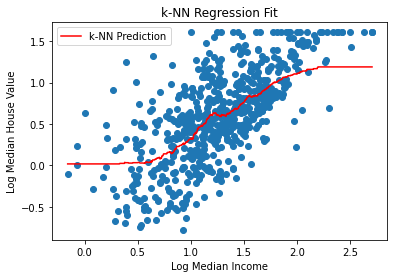

In [5]:
knn = KNeighborsRegressor(n_neighbors=103)
knn.fit(housing_df[['log_MedInc']], housing_df['log_Target'])

pred = pd.DataFrame()
pred['log_MedInc'] = np.linspace(housing_df[['log_MedInc']].min(), housing_df[['log_MedInc']].max(), 1000).T[0]
pred['log_Target'] = knn.predict(pred[['log_MedInc']])

plt.scatter(housing_df['log_MedInc'], housing_df['log_Target'])
plt.plot(pred['log_MedInc'], pred['log_Target'], color='red', label='k-NN Prediction')
plt.xlabel('Log Median Income')
plt.ylabel('Log Median House Value')
plt.title('k-NN Regression Fit')
plt.legend()
plt.show()

#### K-NN Classifier

In [6]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Import Iris dataset from sklearn

In [7]:
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df['Target'] = data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Plot the datapoints (X1=Sepal Length, X2=Petal Length, Color=Class labels)

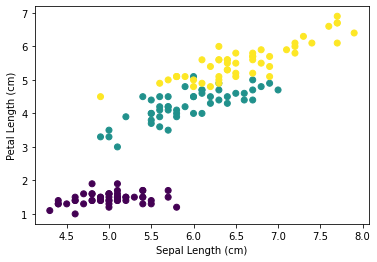

In [8]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['petal length (cm)'], c=iris_df['Target'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

Find the best value of K for the K-NN Classifier using a `training_test_split`

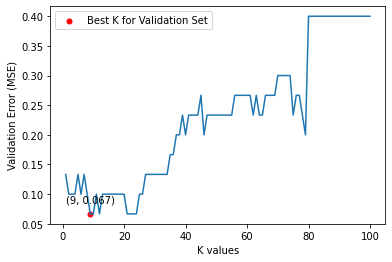

In [9]:
standard_scaler = StandardScaler()

X = iris_df[['sepal length (cm)', 'petal length (cm)']]
X = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)
y = iris_df['Target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
K_values = range(1,101)
error_scores = dict()

for k in K_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    error_scores[k] = 1 - accuracy_score(y_val, y_pred)

error_scores = pd.Series(error_scores)

min_index = error_scores.idxmin()
plt.plot(error_scores.index, error_scores.values)
plt.text(error_scores.idxmin(), error_scores.min()+0.015, f'({error_scores.idxmin()}, {(error_scores.min()).round(3)})', ha='center', va='bottom')
plt.scatter(min_index, error_scores[min_index], color='red', label='Best K for Validation Set', s=25)
plt.xlabel('K values')
plt.ylabel('Validation Error (MSE)')
plt.legend()
plt.show()

Classification fit over the scatter plot of the data

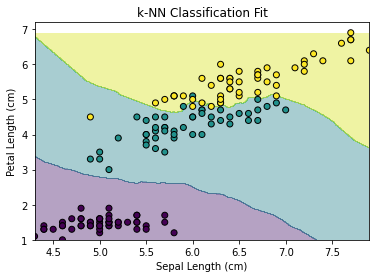

In [10]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X, y)

x_range = np.arange(iris_df['sepal length (cm)'].min(), iris_df['sepal length (cm)'].max(), 0.01)
y_range = np.arange(iris_df['petal length (cm)'].min(), iris_df['petal length (cm)'].max(), 0.01)
xx, yy = np.meshgrid(x_range, y_range)
points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = ['sepal length (cm)', 'petal length (cm)'])
points_scaled = pd.DataFrame(standard_scaler.transform(points), columns=points.columns)
y_pred = knn.predict(points_scaled)
y_pred = y_pred.reshape(xx.shape)

plt.contourf(xx, yy, y_pred, alpha=0.4)
plt.scatter(iris_df['sepal length (cm)'], iris_df['petal length (cm)'], c=iris_df['Target'], edgecolors='black')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('k-NN Classification Fit')
plt.show()